In [13]:
import numpy as np 
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import MiniBatchKMeans

In [14]:
#importation  des données 
data = pd.read_csv('../Data/flights.csv',low_memory=False)

In [15]:
data.shape


(5819079, 31)

In [16]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [18]:
data.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [19]:
data.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [20]:
def data_info(data):
    info_dict = {


    'nombre de valeurs non null': data.count().tolist(), # contage des valeurs non nulles de chaque colonne   de notre dataframe
    'nombre de valeurs null': data.shape[0] -data.count(),

    'type': data.dtypes.tolist(), # affiche le type de chaque colonne

    '% de valeurs Null' : ( data.shape[0] - data.count()) * 100 /  data.shape[0] ,# Calcul du pourcentage de valeurs nulles

    'valeurs uniques' : data.nunique().tolist(),# affiche le nombre de valeurs uniques de chaque colonne

    }
    return pd.DataFrame(info_dict)

In [21]:
data_info(data)

,nombre de valeurs non null,nombre de valeurs null,type,% de valeurs Null,valeurs uniques
YEAR,5819079,0,int64,0.000000,1
MONTH,5819079,0,int64,0.000000,12
DAY,5819079,0,int64,0.000000,31
DAY_OF_WEEK,5819079,0,int64,0.000000,7
AIRLINE,5819079,0,object,0.000000,14
FLIGHT_NUMBER,5819079,0,int64,0.000000,6952
TAIL_NUMBER,5804358,14721,object,0.252978,4897
ORIGIN_AIRPORT,5819079,0,object,0.000000,628
DESTINATION_AIRPORT,5819079,0,object,0.000000,629
SCHEDULED_DEPARTURE,5819079,0,int64,0.000000,1321


In [22]:
data.nunique()

YEAR                      1
MONTH                    12
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6952
TAIL_NUMBER            4897
ORIGIN_AIRPORT          628
DESTINATION_AIRPORT     629
SCHEDULED_DEPARTURE    1321
DEPARTURE_TIME         1440
DEPARTURE_DELAY        1217
TAXI_OUT                184
WHEELS_OFF             1440
SCHEDULED_TIME          550
ELAPSED_TIME            712
AIR_TIME                675
DISTANCE               1363
WHEELS_ON              1440
TAXI_IN                 185
SCHEDULED_ARRIVAL      1435
ARRIVAL_TIME           1440
ARRIVAL_DELAY          1240
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       4
AIR_SYSTEM_DELAY        570
SECURITY_DELAY          154
AIRLINE_DELAY          1067
LATE_AIRCRAFT_DELAY     695
WEATHER_DELAY           632
dtype: int64

Text(0, 0.5, 'Number of Flights')

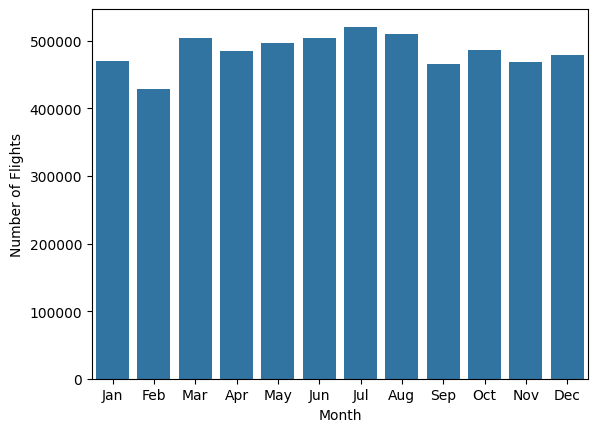

In [23]:
month_map = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec",
}
data["month_name"] = data["MONTH"].map(month_map)
sns.countplot(x="month_name", data=data, order=month_map.values())
plt.xlabel("Month")
plt.ylabel("Number of Flights")

In [24]:
new_data = data.drop(["CANCELLATION_REASON","AIR_SYSTEM_DELAY","SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY","FLIGHT_NUMBER","ORIGIN_AIRPORT","DESTINATION_AIRPORT",'TAIL_NUMBER'],axis =1)

In [25]:
new_data.columns


Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'month_name'],
      dtype='object')

In [26]:
new_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,month_name
0,2015,1,1,4,AS,5,2354.0,-11.0,21.0,15.0,...,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,Jan
1,2015,1,1,4,AA,10,2.0,-8.0,12.0,14.0,...,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,Jan
2,2015,1,1,4,US,20,18.0,-2.0,16.0,34.0,...,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,Jan
3,2015,1,1,4,AA,20,15.0,-5.0,15.0,30.0,...,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,Jan
4,2015,1,1,4,AS,25,24.0,-1.0,11.0,35.0,...,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,2359,2355.0,-4.0,22.0,17.0,...,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,Dec
5819075,2015,12,31,4,B6,2359,2355.0,-4.0,17.0,12.0,...,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,Dec
5819076,2015,12,31,4,B6,2359,2350.0,-9.0,17.0,7.0,...,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,Dec
5819077,2015,12,31,4,B6,2359,2353.0,-6.0,10.0,3.0,...,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,Dec


In [27]:
"""for col in  new_data.columns :
    new_data[col].fillna(new_data[col].mean(), inplace=True)"""

'for col in  new_data.columns :\n    new_data[col].fillna(new_data[col].mean(), inplace=True)'

In [28]:
new_data = pd.get_dummies(new_data, columns=['AIRLINE'] , dtype=int)

In [29]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 35 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   SCHEDULED_DEPARTURE  int64  
 5   DEPARTURE_TIME       float64
 6   DEPARTURE_DELAY      float64
 7   TAXI_OUT             float64
 8   WHEELS_OFF           float64
 9   SCHEDULED_TIME       float64
 10  ELAPSED_TIME         float64
 11  AIR_TIME             float64
 12  DISTANCE             int64  
 13  WHEELS_ON            float64
 14  TAXI_IN              float64
 15  SCHEDULED_ARRIVAL    int64  
 16  ARRIVAL_TIME         float64
 17  ARRIVAL_DELAY        float64
 18  DIVERTED             int64  
 19  CANCELLED            int64  
 20  month_name           object 
 21  AIRLINE_AA           int32  
 22  AIRLINE_AS           int32  
 23  AIRLINE_B6           int32  
 24

In [30]:
#new_data.duplicated().sum()

In [31]:
new_data.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'month_name', 'AIRLINE_AA', 'AIRLINE_AS',
       'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9', 'AIRLINE_HA',
       'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA', 'AIRLINE_US',
       'AIRLINE_VX', 'AIRLINE_WN'],
      dtype='object')

In [32]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 35 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   SCHEDULED_DEPARTURE  int64  
 5   DEPARTURE_TIME       float64
 6   DEPARTURE_DELAY      float64
 7   TAXI_OUT             float64
 8   WHEELS_OFF           float64
 9   SCHEDULED_TIME       float64
 10  ELAPSED_TIME         float64
 11  AIR_TIME             float64
 12  DISTANCE             int64  
 13  WHEELS_ON            float64
 14  TAXI_IN              float64
 15  SCHEDULED_ARRIVAL    int64  
 16  ARRIVAL_TIME         float64
 17  ARRIVAL_DELAY        float64
 18  DIVERTED             int64  
 19  CANCELLED            int64  
 20  month_name           object 
 21  AIRLINE_AA           int32  
 22  AIRLINE_AS           int32  
 23  AIRLINE_B6           int32  
 24

In [33]:
"""for col in  new_data.columns :
    new_data.fillna({col: new_data[col].mean()}, inplace=True)"""

'for col in  new_data.columns :\n    new_data.fillna({col: new_data[col].mean()}, inplace=True)'

In [34]:
# Sélection des colonnes pertinentes
cols = ['MONTH', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DISTANCE', 'AIRLINE_AA', 'AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9', 'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA', 'AIRLINE_US', 'AIRLINE_VX', 'AIRLINE_WN']
cluster_data = new_data[cols]

# Normalisation des données
#scaler = StandardScaler()
#data_scaled = scaler.fit_transform()


In [35]:
for col in  cluster_data.columns :
    cluster_data.fillna({col: cluster_data[col].mean()}, inplace=True)

C:\Users\23769\AppData\Local\Temp\ipykernel_21952\3690038340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data.fillna({col: cluster_data[col].mean()}, inplace=True)


In [36]:
#linkage_data = linkage(cluster_data, method='ward', metric='euclidean')

In [37]:
n_clusters = 14
minibatch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=0, batch_size=100)
minibatch_kmeans.fit(cluster_data)

# Attribution des étiquettes de cluster au DataFrame
cluster_data['cluster_label'] = minibatch_kmeans.labels_

# Afficher quelques statistiques des clusters
print(cluster_data['cluster_label'].value_counts())

c:\Users\23769\Documents\M2 orleans\TP 5IA\.env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\23769\Documents\M2 orleans\TP 5IA\.env\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


cluster_label
13    630183
0     607230
2     567462
3     541999
11    535646
7     533062
9     487963
10    486061
12    356040
1     296100
8     257978
4     190386
6     166685
5     162284
Name: count, dtype: int64


C:\Users\23769\AppData\Local\Temp\ipykernel_21952\180648938.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['cluster_label'] = minibatch_kmeans.labels_


In [38]:
cluster_data[cluster_data['cluster_label'] == 1]

,MONTH,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DISTANCE,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN,cluster_label
0,1,4,5,430,1448,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,4,25,320,1448,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5,1,4,25,602,1589,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
6,1,4,25,526,1299,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
7,1,4,30,803,2125,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5810767,12,4,1040,1250,1514,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
5810799,12,4,1040,1231,1438,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5810864,12,4,1045,1237,1431,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5810936,12,4,1050,1225,1334,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
